목표 : 수익률 계산
===============
if label == 0: # 변동성 하락

    → 양매도
elif label == 1: # 변동성 상승

    → 양매수

# import modules & load files

import modules

In [357]:
import pandas as pd
import numpy as np
import math
import glob
import datetime
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')
warnings.filterwarnings('ignore')
import os
current_directory = os.getcwd()
print("현재 디렉토리:", current_directory)

현재 디렉토리: d:\myhub\Project1


## load files

strike price set

In [358]:
# strike price set
CTB09sp = pd.read_csv('./target_price_set/CTB09sp.csv', index_col=0)
CTB15sp = pd.read_csv('./target_price_set/CTB15sp.csv', index_col=0)
PTB09sp = pd.read_csv('./target_price_set/PTB09sp.csv', index_col=0)
PTB15sp = pd.read_csv('./target_price_set/PTB15sp.csv', index_col=0)

In [359]:
CTB15sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,3.66,NaN,NaN,NaN,NaN,2.30,1.36,0.75,0.39
2023-11-06,4.01,12.95,8.46,7.52,5.61,2.70,1.71,0.93,0.59
2023-11-03,3.12,11.25,8.90,6.71,4.76,1.86,0.98,0.46,0.19
2023-11-02,2.87,10.45,8.21,6.15,4.41,1.79,1.00,0.51,0.24
2023-11-01,4.76,12.90,10.45,8.36,6.46,3.35,2.23,1.39,0.80
2023-10-31,4.37,NaN,9.40,7.55,5.93,3.07,2.08,1.30,0.78
2023-10-30,5.21,13.20,10.65,8.70,6.81,3.80,2.66,1.78,1.11
2023-10-27,5.13,NaN,10.35,8.39,6.66,3.81,2.71,1.85,1.19


In [360]:
PTB09sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,1.19,0.13,0.22,0.40,0.69,1.95,3.06,4.54,6.38
2023-11-06,8.81,1.78,3.01,4.60,6.59,11.30,13.65,15.70,19.35
2023-11-03,2.87,0.32,0.59,1.00,1.80,4.30,6.11,8.20,9.76
2023-11-02,2.69,0.38,0.64,1.07,1.66,4.00,5.66,7.60,9.60
2023-11-01,2.43,0.44,0.70,1.09,1.65,3.50,5.30,6.50,8.34
2023-10-31,1.95,NaN,0.61,0.92,1.35,2.76,3.80,6.31,6.65
2023-10-30,4.15,1.23,1.71,2.33,3.13,5.40,7.14,8.60,10.30
2023-10-27,4.18,1.35,1.82,2.43,3.21,5.36,7.06,8.38,10.30


In [361]:
PTB15sp

,기준행사가,S-4,S-3,S-2,S-1,S+1,S+2,S+3,S+4
날짜,,,,,,,,,
2023-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-07,1.52,0.11,0.23,0.47,0.92,2.57,4.03,5.91,7.92
2023-11-06,2.50,0.43,0.66,1.05,1.63,3.74,5.45,6.52,10.75
2023-11-03,2.14,0.19,0.37,0.66,1.26,3.41,5.04,7.05,9.43
2023-11-02,3.08,0.42,0.73,1.23,1.85,4.52,6.20,8.15,10.55
2023-11-01,2.36,0.41,0.66,1.03,1.58,3.41,4.86,6.37,8.26
2023-10-31,3.53,NaN,1.24,1.79,2.54,4.76,6.27,7.84,10.05
2023-10-30,3.19,0.84,1.20,1.69,2.34,4.26,5.75,7.09,8.50
2023-10-27,3.99,1.23,1.69,2.28,3.04,5.14,6.63,8.23,10.05


before label

In [362]:
# before label
VKOSPI_Label = pd.read_csv('./dataset/VKOSPI_Label.csv', index_col=0)
VKOSPI_Label[['cost', 'revenue', 'profit', 'return']] = 0
# VKOSPI_Label.set_index('날짜', inplace=True)
VKOSPI_Label

,VKOSPI_Label,cost,revenue,profit,return
날짜,,,,,
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,1,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,1,0,0,0,0
2023-10-20,1,0,0,0,0


In [363]:
VKOSPI_Label.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='날짜')

In [364]:
VKOSPI_Label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   VKOSPI_Label  19 non-null     int64
 1   cost          19 non-null     int64
 2   revenue       19 non-null     int64
 3   profit        19 non-null     int64
 4   return        19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


new label

In [365]:
new = pd.read_csv('./dataset/test_features.csv', index_col=0)[['VKOSPI_Label']]

In [366]:
new[['cost', 'revenue', 'profit', 'return']] = 0

In [367]:
new

,VKOSPI_Label,cost,revenue,profit,return
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,0,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,1,0,0,0,0
2023-10-20,1,0,0,0,0
2023-10-23,0,0,0,0,0


In [368]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   VKOSPI_Label  19 non-null     int64
 1   cost          19 non-null     int64
 2   revenue       19 non-null     int64
 3   profit        19 non-null     int64
 4   return        19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


In [369]:
new.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object')

predict

In [370]:
predict = pd.DataFrame([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], columns=['predict'], index=new.index)

In [371]:
predict[['cost', 'revenue', 'profit', 'return']] = 0
predict

,predict,cost,revenue,profit,return
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,0,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,0,0,0,0,0
2023-10-20,1,0,0,0,0
2023-10-23,1,0,0,0,0


In [372]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023-10-10 to 2023-11-03
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   predict  19 non-null     int64
 1   cost     19 non-null     int64
 2   revenue  19 non-null     int64
 3   profit   19 non-null     int64
 4   return   19 non-null     int64
dtypes: int64(5)
memory usage: 912.0+ bytes


In [373]:
predict.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object')

short_straddle

In [374]:
short_straddle = predict.copy()

In [375]:
short_straddle

,predict,cost,revenue,profit,return
2023-10-10,1,0,0,0,0
2023-10-11,0,0,0,0,0
2023-10-12,0,0,0,0,0
2023-10-13,0,0,0,0,0
2023-10-16,0,0,0,0,0
2023-10-17,0,0,0,0,0
2023-10-18,0,0,0,0,0
2023-10-19,0,0,0,0,0
2023-10-20,1,0,0,0,0
2023-10-23,1,0,0,0,0


short_straddle_long_straddle

In [376]:
short_straddle_long_straddle = predict.copy()

short_1strangle_long_straddle

In [377]:
short_1strangle_long_straddle = predict.copy()

short_2strangle_long_straddle

In [378]:
short_2strangle_long_straddle = predict.copy()

short_straddle_long_2strangle

In [379]:
short_straddle_long_2strangle = predict.copy()

short_1strangle_long_2strangle

In [380]:
short_1strangle_long_2strangle = predict.copy()

short_2strangle_long_2strangle

In [381]:
short_2strangle_long_2strangle = predict.copy()

benchmark kospi200

In [382]:
ks200 = pd.read_csv('./dataset/data/KOSPI200.csv')

In [383]:
ks200['날짜'] = pd.to_datetime(ks200['날짜'], format="%Y- %m- %d")

In [384]:
ks200.set_index('날짜', inplace=True)
ks200.sort_index(inplace=True)

In [385]:
ks200['변동 %'] = ks200['변동 %'].str.rstrip('%').astype(float)

In [386]:
ks200

,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2022-10-13,282.57,286.27,286.36,282.57,133.29M,-1.57
2022-10-14,289.36,287.59,290.32,286.59,132.07M,2.40
2022-10-17,289.57,285.89,290.04,284.91,111.60M,0.07
2022-10-18,293.59,293.34,293.78,289.77,117.12M,1.39
2022-10-19,291.29,293.41,295.34,290.90,110.85M,-0.78
...,...,...,...,...,...,...
2023-11-02,315.16,314.59,316.51,314.12,112.38M,1.76
2023-11-03,318.24,317.96,318.76,316.50,89.97M,0.98
2023-11-06,334.16,322.62,334.16,321.57,174.43M,5.00


In [387]:
ks200.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2022-10-13 to 2023-11-08
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      266 non-null    float64
 1   시가      266 non-null    float64
 2   고가      266 non-null    float64
 3   저가      266 non-null    float64
 4   거래량     266 non-null    object 
 5   변동 %    266 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.5+ KB


In [388]:
ks200.index

DatetimeIndex(['2022-10-13', '2022-10-14', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-26',
               ...
               '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31',
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08'],
              dtype='datetime64[ns]', name='날짜', length=266, freq=None)

기간조정

In [389]:
start_date = pd.to_datetime("2023-10-10")
end_date = pd.to_datetime("2023-11-03")
ks200 = ks200.loc[start_date:end_date]
ks200.index = ks200.index.to_series().apply(lambda x: x.strftime('%Y-%m-%d'))

In [390]:
ks200.index

Index(['2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
       '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
       '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
       '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03'],
      dtype='object', name='날짜')

In [391]:
ks200['return_cumprod'] = (ks200['변동 %'] / 100 + 1).cumprod() *100

In [392]:
ks200

,종가,시가,고가,저가,거래량,변동 %,return_cumprod
날짜,,,,,,,
2023-10-10,319.11,322.97,324.85,319.06,128.82M,0.05,100.050000
2023-10-11,324.74,323.96,327.26,323.95,119.11M,1.76,101.810880
2023-10-12,328.85,326.89,328.85,326.89,108.82M,1.27,103.103878
2023-10-13,325.77,326.11,327.33,325.43,91.78M,-0.94,102.134702
2023-10-16,323.29,324.10,326.00,321.32,93.10M,-0.76,101.358478
2023-10-17,327.35,325.70,328.26,325.01,88.46M,1.26,102.635595
2023-10-18,328.82,326.32,329.06,326.12,134.13M,0.45,103.097455
2023-10-19,322.76,324.75,325.08,322.40,115.71M,-1.84,101.200462
2023-10-20,317.96,319.45,320.18,316.28,112.71M,-1.49,99.692575


# 양매도, 양매수 스트래들

new label

In [393]:
for d in new.index:    
    if new.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            new['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            new['revenue'].loc[d] = revenue # 15시 값 합
            new['profit'].loc[d] = cost - revenue
            new['return'].loc[d] = (cost - revenue) / revenue
        except:     
            new['cost'].loc[d] = np.nan
            new['revenue'].loc[d] = np.nan 
            new['profit'].loc[d] = np.nan 
            new['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            new['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            new['revenue'].loc[d] = revenue
            new['profit'].loc[d] = revenue - cost
            new['return'].loc[d] = (revenue - cost) / cost
        except:
            new['cost'].loc[d] = np.nan
            new['revenue'].loc[d] = np.nan
            new['profit'].loc[d] = np.nan
            new['return'].loc[d] = np.nan

In [394]:
new

,VKOSPI_Label,cost,revenue,profit,return
2023-10-10,1,NaN,18.04,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311
2023-10-13,0,16.73,16.59,0.14,0.008439
2023-10-16,0,16.70,16.57,0.13,0.007846
2023-10-17,0,15.64,15.92,-0.28,-0.017588
2023-10-18,0,16.05,15.68,0.37,0.023597
2023-10-19,1,16.10,16.42,0.32,0.019876
2023-10-20,1,16.80,17.06,0.26,0.015476
2023-10-23,0,17.10,16.40,0.70,0.042683


In [395]:
new['return_cumprod'] = (new['return'] + 1).cumprod() * 100

In [396]:
new

,VKOSPI_Label,cost,revenue,profit,return,return_cumprod
2023-10-10,1,NaN,18.04,NaN,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311,101.431127
2023-10-13,0,16.73,16.59,0.14,0.008439,102.287086
2023-10-16,0,16.70,16.57,0.13,0.007846,103.089580
2023-10-17,0,15.64,15.92,-0.28,-0.017588,101.276446
2023-10-18,0,16.05,15.68,0.37,0.023597,103.666260
2023-10-19,1,16.10,16.42,0.32,0.019876,105.726708
2023-10-20,1,16.80,17.06,0.26,0.015476,107.362954
2023-10-23,0,17.10,16.40,0.70,0.042683,111.945520


In [397]:
new['profit'].sum()

2.8000000000000025

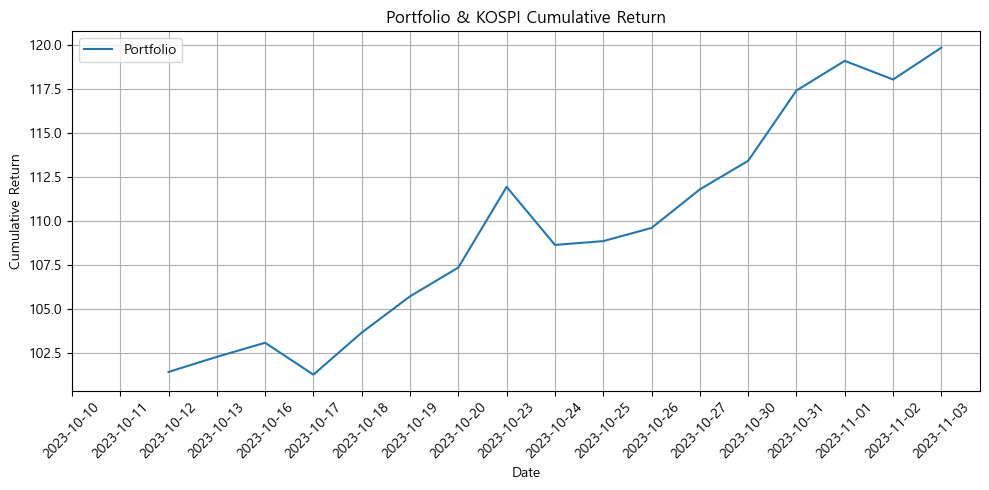

In [398]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
plt.plot(new.index, new['return_cumprod'], label='Portfolio')
# plt.plot(new.index, new['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
plt.xticks(new.index[::int(len(new.index)/10)], rotation=45)

plt.title('Portfolio & KOSPI Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

old label

In [399]:
for d in VKOSPI_Label.index:    
    if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue # 15시 값 합
            VKOSPI_Label['profit'].loc[d] = cost - revenue
            VKOSPI_Label['return'].loc[d] = (cost - revenue) / revenue
        except:     
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan 
            VKOSPI_Label['profit'].loc[d] = np.nan 
            VKOSPI_Label['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승| 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-2'].loc[d]
            cost += PTB09sp['S+2'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-2'].loc[d]
            revenue += PTB15sp['S+2'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
            VKOSPI_Label['profit'].loc[d] = revenue - cost
            VKOSPI_Label['return'].loc[d] = (revenue - cost) / cost
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
            VKOSPI_Label['profit'].loc[d] = np.nan
            VKOSPI_Label['return'].loc[d] = np.nan

In [400]:
VKOSPI_Label['return_cumprod'] = (VKOSPI_Label['return'] + 1).cumprod() * 100

In [401]:
VKOSPI_Label

,VKOSPI_Label,cost,revenue,profit,return,return_cumprod
날짜,,,,,,
2023-10-10,1,NaN,18.04,NaN,NaN,NaN
2023-10-11,0,17.87,NaN,NaN,NaN,NaN
2023-10-12,0,17.01,16.77,0.24,0.014311,101.431127
2023-10-13,0,16.73,16.59,0.14,0.008439,102.287086
2023-10-16,1,16.70,16.57,-0.13,-0.007784,101.490839
2023-10-17,0,15.64,15.92,-0.28,-0.017588,99.705824
2023-10-18,0,16.05,15.68,0.37,0.023597,102.058577
2023-10-19,1,16.10,16.42,0.32,0.019876,104.087070
2023-10-20,1,16.80,17.06,0.26,0.015476,105.697941


In [402]:
VKOSPI_Label['profit'].sum()

1.8800000000000008

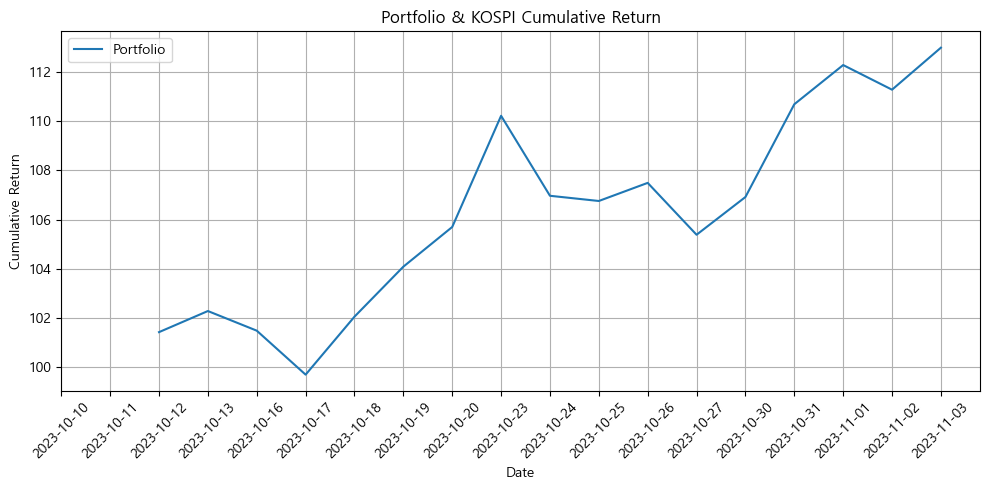

In [403]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='Portfolio')
# plt.plot(VKOSPI_Label.index, VKOSPI_Label['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)

plt.title('Portfolio & KOSPI Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

predict

In [404]:
for d in predict.index:    
    if predict.loc[d, 'predict'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['S-1'].loc[d]
            cost += PTB09sp['S+1'].loc[d]
            predict['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S-1'].loc[d]
            revenue += PTB15sp['S+1'].loc[d]
            predict['revenue'].loc[d] = revenue # 15시 값 합
            predict['profit'].loc[d] = cost - revenue
            predict['return'].loc[d] = (cost - revenue) / revenue
        except:     
            predict['cost'].loc[d] = np.nan
            predict['revenue'].loc[d] = np.nan 
            predict['profit'].loc[d] = np.nan 
            predict['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['S-1'].loc[d]
            cost += PTB09sp['S+1'].loc[d]
            predict['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S-1'].loc[d]
            revenue += PTB15sp['S+1'].loc[d]
            predict['revenue'].loc[d] = revenue
            predict['profit'].loc[d] = revenue - cost
            predict['return'].loc[d] = (revenue - cost) / cost
        except:
            predict['cost'].loc[d] = np.nan
            predict['revenue'].loc[d] = np.nan
            predict['profit'].loc[d] = np.nan
            predict['return'].loc[d] = np.nan

In [405]:
predict

,predict,cost,revenue,profit,return
2023-10-10,1,16.48,15.13,-1.35,-0.081917
2023-10-11,0,14.75,14.76,-0.01,-0.000678
2023-10-12,0,13.90,13.66,0.24,0.017570
2023-10-13,0,13.72,13.49,0.23,0.017050
2023-10-16,0,13.13,13.55,-0.42,-0.030996
2023-10-17,0,12.66,12.97,-0.31,-0.023901
2023-10-18,0,12.91,12.50,0.41,0.032800
2023-10-19,0,13.35,13.17,0.18,0.013667
2023-10-20,1,13.62,14.05,0.43,0.031571
2023-10-23,1,14.03,13.31,-0.72,-0.051319


In [406]:
predict['predict_cumprod'] = (predict['return'] + 1).cumprod() * 100

In [407]:
predict

,predict,cost,revenue,profit,return,predict_cumprod
2023-10-10,1,16.48,15.13,-1.35,-0.081917,91.808252
2023-10-11,0,14.75,14.76,-0.01,-0.000678,91.746052
2023-10-12,0,13.90,13.66,0.24,0.017570,93.357988
2023-10-13,0,13.72,13.49,0.23,0.017050,94.949711
2023-10-16,0,13.13,13.55,-0.42,-0.030996,92.006620
2023-10-17,0,12.66,12.97,-0.31,-0.023901,89.807541
2023-10-18,0,12.91,12.50,0.41,0.032800,92.753229
2023-10-19,0,13.35,13.17,0.18,0.013667,94.020927
2023-10-20,1,13.62,14.05,0.43,0.031571,96.989282
2023-10-23,1,14.03,13.31,-0.72,-0.051319,92.011927


In [408]:
print(predict['profit'].sum())

-1.7900000000000045


short_straddle

In [409]:
for d in short_straddle.index:    
    if short_straddle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 스트랭글
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_straddle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_straddle['revenue'].loc[d] = revenue # 15시 값 합
            short_straddle['profit'].loc[d] = cost - revenue
            short_straddle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_straddle['cost'].loc[d] = np.nan
            short_straddle['revenue'].loc[d] = np.nan 
            short_straddle['profit'].loc[d] = np.nan 
            short_straddle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 없이 관망
        try:
            short_straddle['cost'].loc[d] = 0            
            short_straddle['revenue'].loc[d] = 0
            short_straddle['profit'].loc[d] = 0
            short_straddle['return'].loc[d] = 0
        except:
            short_straddle['cost'].loc[d] = np.nan
            short_straddle['revenue'].loc[d] = np.nan
            short_straddle['profit'].loc[d] = np.nan
            short_straddle['return'].loc[d] = np.nan
short_straddle['predict_cumprod'] = (short_straddle['return'] + 1).cumprod() * 100
print(short_straddle)
print(short_straddle['profit'].sum())

            predict   cost  revenue  profit    return  predict_cumprod
2023-10-10        1   0.00     0.00    0.00  0.000000       100.000000
2023-10-11        0  12.09    12.06    0.03  0.002488       100.248756
2023-10-12        0  11.33    11.02    0.31  0.028131       103.068821
2023-10-13        0  11.11    10.93    0.18  0.016468       104.766203
2023-10-16        0  10.55    10.91   -0.36 -0.032997       101.309207
2023-10-17        0   9.94    10.26   -0.32 -0.031189        98.149465
2023-10-18        0  10.20     9.77    0.43  0.044012       102.469247
2023-10-19        0  10.63    10.54    0.09  0.008539       103.344222
2023-10-20        1   0.00     0.00    0.00  0.000000       103.344222
2023-10-23        1   0.00     0.00    0.00  0.000000       103.344222
2023-10-24        0   9.66     9.85   -0.19 -0.019289       101.350780
2023-10-25        0   9.47     9.40    0.07  0.007447       102.105520
2023-10-26        0  10.22    10.15    0.07  0.006897       102.809696
2023-1

short_straddle_long_straddle

In [410]:
for d in short_straddle_long_straddle.index:    
    if short_straddle_long_straddle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 스트래들
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_straddle_long_straddle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_straddle_long_straddle['revenue'].loc[d] = revenue # 15시 값 합
            short_straddle_long_straddle['profit'].loc[d] = cost - revenue
            short_straddle_long_straddle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_straddle_long_straddle['cost'].loc[d] = np.nan
            short_straddle_long_straddle['revenue'].loc[d] = np.nan 
            short_straddle_long_straddle['profit'].loc[d] = np.nan 
            short_straddle_long_straddle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_straddle_long_straddle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_straddle_long_straddle['revenue'].loc[d] = revenue
            short_straddle_long_straddle['profit'].loc[d] = revenue - cost
            short_straddle_long_straddle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_straddle_long_straddle['cost'].loc[d] = np.nan
            short_straddle_long_straddle['revenue'].loc[d] = np.nan
            short_straddle_long_straddle['profit'].loc[d] = np.nan
            short_straddle_long_straddle['return'].loc[d] = np.nan
short_straddle_long_straddle['predict_cumprod'] = (short_straddle_long_straddle['return'] + 1).cumprod() * 100
print(short_straddle_long_straddle)
print(short_straddle_long_straddle['profit'].sum())

            predict   cost  revenue  profit    return  predict_cumprod
2023-10-10        1  13.74    12.54   -1.20 -0.087336        91.266376
2023-10-11        0  12.09    12.06    0.03  0.002488        91.493406
2023-10-12        0  11.33    11.02    0.31  0.028131        94.067177
2023-10-13        0  11.11    10.93    0.18  0.016468        95.616317
2023-10-16        0  10.55    10.91   -0.36 -0.032997        92.461241
2023-10-17        0   9.94    10.26   -0.32 -0.031189        89.577460
2023-10-18        0  10.20     9.77    0.43  0.044012        93.519968
2023-10-19        0  10.63    10.54    0.09  0.008539        94.318526
2023-10-20        1  10.98    11.38    0.40  0.036430        97.754538
2023-10-23        1  11.34    10.61   -0.73 -0.064374        91.461697
2023-10-24        0   9.66     9.85   -0.19 -0.019289        89.697461
2023-10-25        0   9.47     9.40    0.07  0.007447        90.365421
2023-10-26        0  10.22    10.15    0.07  0.006897        90.988631
2023-1

short_1strangle_long_straddle

In [411]:
for d in short_1strangle_long_straddle.index:    
    if short_1strangle_long_straddle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 1p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+1'].loc[d]
            cost += PTB09sp['S-1'].loc[d]
            short_1strangle_long_straddle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S+1'].loc[d]
            revenue += PTB15sp['S-1'].loc[d]
            short_1strangle_long_straddle['revenue'].loc[d] = revenue # 15시 값 합
            short_1strangle_long_straddle['profit'].loc[d] = cost - revenue
            short_1strangle_long_straddle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_1strangle_long_straddle['cost'].loc[d] = np.nan
            short_1strangle_long_straddle['revenue'].loc[d] = np.nan 
            short_1strangle_long_straddle['profit'].loc[d] = np.nan 
            short_1strangle_long_straddle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_1strangle_long_straddle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_1strangle_long_straddle['revenue'].loc[d] = revenue
            short_1strangle_long_straddle['profit'].loc[d] = revenue - cost
            short_1strangle_long_straddle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_1strangle_long_straddle['cost'].loc[d] = np.nan
            short_1strangle_long_straddle['revenue'].loc[d] = np.nan
            short_1strangle_long_straddle['profit'].loc[d] = np.nan
            short_1strangle_long_straddle['return'].loc[d] = np.nan
short_1strangle_long_straddle['predict_cumprod'] = (short_1strangle_long_straddle['return'] + 1).cumprod() * 100
print(short_1strangle_long_straddle)
print(short_1strangle_long_straddle['profit'].sum())

            predict   cost  revenue  profit    return  predict_cumprod
2023-10-10        1  13.74    12.54   -1.20 -0.087336        91.266376
2023-10-11        0   9.85     9.67    0.18  0.018614        92.965233
2023-10-12        0   8.96     8.82    0.14  0.015873        94.440871
2023-10-13        0   8.72     8.61    0.11  0.012776        95.647433
2023-10-16        0   8.28     8.59   -0.31 -0.036088        92.195663
2023-10-17        0   7.70     7.93   -0.23 -0.029004        89.521640
2023-10-18        0   7.86     7.48    0.38  0.050802        94.069531
2023-10-19        0   8.30     8.29    0.01  0.001206        94.183004
2023-10-20        1  10.98    11.38    0.40  0.036430        97.614079
2023-10-23        1  11.34    10.61   -0.73 -0.064374        91.330280
2023-10-24        0   7.40     7.57   -0.17 -0.022457        89.279270
2023-10-25        0   7.52     7.11    0.41  0.057665        94.427582
2023-10-26        0   7.94     7.82    0.12  0.015345        95.876599
2023-1

short_2strangle_long_straddle

In [412]:
for d in short_2strangle_long_straddle.index:    
    if short_2strangle_long_straddle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 2p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+2'].loc[d]
            cost += PTB09sp['S-2'].loc[d]
            short_2strangle_long_straddle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S+2'].loc[d]
            revenue += PTB15sp['S-2'].loc[d]
            short_2strangle_long_straddle['revenue'].loc[d] = revenue # 15시 값 합
            short_2strangle_long_straddle['profit'].loc[d] = cost - revenue
            short_2strangle_long_straddle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_2strangle_long_straddle['cost'].loc[d] = np.nan
            short_2strangle_long_straddle['revenue'].loc[d] = np.nan 
            short_2strangle_long_straddle['profit'].loc[d] = np.nan 
            short_2strangle_long_straddle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_2strangle_long_straddle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_2strangle_long_straddle['revenue'].loc[d] = revenue
            short_2strangle_long_straddle['profit'].loc[d] = revenue - cost
            short_2strangle_long_straddle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_2strangle_long_straddle['cost'].loc[d] = np.nan
            short_2strangle_long_straddle['revenue'].loc[d] = np.nan
            short_2strangle_long_straddle['profit'].loc[d] = np.nan
            short_2strangle_long_straddle['return'].loc[d] = np.nan
short_2strangle_long_straddle['predict_cumprod'] = (short_2strangle_long_straddle['return'] + 1).cumprod() * 100
print(short_2strangle_long_straddle)
print(short_2strangle_long_straddle['profit'].sum())

            predict   cost  revenue  profit    return  predict_cumprod
2023-10-10        1  13.74    12.54   -1.20 -0.087336        91.266376
2023-10-11        0   7.78     7.68    0.10  0.013021        92.454740
2023-10-12        0   7.00     6.88    0.12  0.017442        94.067322
2023-10-13        0   6.82     6.65    0.17  0.025564        96.472051
2023-10-16        0   6.41     6.62   -0.21 -0.031722        93.411759
2023-10-17        0   5.81     6.04   -0.23 -0.038079        89.854689
2023-10-18        0   5.91     5.62    0.29  0.051601        94.491319
2023-10-19        0   6.35     6.34    0.01  0.001577        94.640359
2023-10-20        1  10.98    11.38    0.40  0.036430        98.088095
2023-10-23        1  11.34    10.61   -0.73 -0.064374        91.773782
2023-10-24        0   5.75     5.66    0.09  0.015901        93.233082
2023-10-25        0   5.37     5.20    0.17  0.032692        96.281087
2023-10-26        0   6.00     5.86    0.14  0.023891        98.581318
2023-1

short_straddle_long_2strangle

In [413]:
for d in short_straddle_long_2strangle.index:    
    if short_straddle_long_2strangle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 스트래들
        try:
            cost = 0
            cost += CTB09sp['기준행사가'].loc[d]
            cost += PTB09sp['기준행사가'].loc[d]
            short_straddle_long_2strangle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['기준행사가'].loc[d]
            revenue += PTB15sp['기준행사가'].loc[d]
            short_straddle_long_2strangle['revenue'].loc[d] = revenue # 15시 값 합
            short_straddle_long_2strangle['profit'].loc[d] = cost - revenue
            short_straddle_long_2strangle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_straddle_long_2strangle['cost'].loc[d] = np.nan
            short_straddle_long_2strangle['revenue'].loc[d] = np.nan 
            short_straddle_long_2strangle['profit'].loc[d] = np.nan 
            short_straddle_long_2strangle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 2p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+2'].loc[d]
            cost += PTB09sp['S-2'].loc[d]
            short_straddle_long_2strangle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+2'].loc[d]
            revenue += PTB15sp['S-2'].loc[d]
            short_straddle_long_2strangle['revenue'].loc[d] = revenue
            short_straddle_long_2strangle['profit'].loc[d] = revenue - cost
            short_straddle_long_2strangle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_straddle_long_2strangle['cost'].loc[d] = np.nan
            short_straddle_long_2strangle['revenue'].loc[d] = np.nan
            short_straddle_long_2strangle['profit'].loc[d] = np.nan
            short_straddle_long_2strangle['return'].loc[d] = np.nan
short_straddle_long_2strangle['predict_cumprod'] = (short_straddle_long_2strangle['return'] + 1).cumprod() * 100
print(short_straddle_long_2strangle)
print(short_straddle_long_2strangle['profit'].sum())

            predict   cost  revenue  profit    return  predict_cumprod
2023-10-10        1   9.30     8.16   -1.14 -0.122581        87.741935
2023-10-11        0  12.09    12.06    0.03  0.002488        87.960199
2023-10-12        0  11.33    11.02    0.31  0.028131        90.434578
2023-10-13        0  11.11    10.93    0.18  0.016468        91.923894
2023-10-16        0  10.55    10.91   -0.36 -0.032997        88.890659
2023-10-17        0   9.94    10.26   -0.32 -0.031189        86.118241
2023-10-18        0  10.20     9.77    0.43  0.044012        89.908501
2023-10-19        0  10.63    10.54    0.09  0.008539        90.676221
2023-10-20        1   7.18     6.88   -0.30 -0.041783        86.887520
2023-10-23        1   6.92     6.31   -0.61 -0.088150        79.228360
2023-10-24        0   9.66     9.85   -0.19 -0.019289        77.700098
2023-10-25        0   9.47     9.40    0.07  0.007447        78.278715
2023-10-26        0  10.22    10.15    0.07  0.006897        78.818569
2023-1

short_1strangle_long_2strangle

In [414]:
for d in short_1strangle_long_2strangle.index:    
    if short_1strangle_long_2strangle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 1p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+1'].loc[d]
            cost += PTB09sp['S-1'].loc[d]
            short_1strangle_long_2strangle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S+1'].loc[d]
            revenue += PTB15sp['S-1'].loc[d]
            short_1strangle_long_2strangle['revenue'].loc[d] = revenue # 15시 값 합
            short_1strangle_long_2strangle['profit'].loc[d] = cost - revenue
            short_1strangle_long_2strangle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_1strangle_long_2strangle['cost'].loc[d] = np.nan
            short_1strangle_long_2strangle['revenue'].loc[d] = np.nan 
            short_1strangle_long_2strangle['profit'].loc[d] = np.nan 
            short_1strangle_long_2strangle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 2p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+2'].loc[d]
            cost += PTB09sp['S-2'].loc[d]
            short_1strangle_long_2strangle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+2'].loc[d]
            revenue += PTB15sp['S-2'].loc[d]
            short_1strangle_long_2strangle['revenue'].loc[d] = revenue
            short_1strangle_long_2strangle['profit'].loc[d] = revenue - cost
            short_1strangle_long_2strangle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_1strangle_long_2strangle['cost'].loc[d] = np.nan
            short_1strangle_long_2strangle['revenue'].loc[d] = np.nan
            short_1strangle_long_2strangle['profit'].loc[d] = np.nan
            short_1strangle_long_2strangle['return'].loc[d] = np.nan
short_1strangle_long_2strangle['predict_cumprod'] = (short_1strangle_long_2strangle['return'] + 1).cumprod() * 100
print(short_1strangle_long_2strangle)
print(short_1strangle_long_2strangle['profit'].sum())

            predict  cost  revenue  profit    return  predict_cumprod
2023-10-10        1  9.30     8.16   -1.14 -0.122581        87.741935
2023-10-11        0  9.85     9.67    0.18  0.018614        89.375188
2023-10-12        0  8.96     8.82    0.14  0.015873        90.793841
2023-10-13        0  8.72     8.61    0.11  0.012776        91.953809
2023-10-16        0  8.28     8.59   -0.31 -0.036088        88.635336
2023-10-17        0  7.70     7.93   -0.23 -0.029004        86.064576
2023-10-18        0  7.86     7.48    0.38  0.050802        90.436841
2023-10-19        0  8.30     8.29    0.01  0.001206        90.545932
2023-10-20        1  7.18     6.88   -0.30 -0.041783        86.762676
2023-10-23        1  6.92     6.31   -0.61 -0.088150        79.114521
2023-10-24        0  7.40     7.57   -0.17 -0.022457        77.337841
2023-10-25        0  7.52     7.11    0.41  0.057665        81.797548
2023-10-26        0  7.94     7.82    0.12  0.015345        83.052753
2023-10-27        0 

short_2strangle_long_2strangle

In [415]:
for d in short_2strangle_long_2strangle.index:    
    if short_2strangle_long_2strangle.loc[d, 'predict'] == 0: # 변동성 하락 양매도 2p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+2'].loc[d]
            cost += PTB09sp['S-2'].loc[d]
            short_2strangle_long_2strangle['cost'].loc[d] = cost # 9시 값 합
            revenue = 0
            revenue += CTB15sp['S+2'].loc[d]
            revenue += PTB15sp['S-2'].loc[d]
            short_2strangle_long_2strangle['revenue'].loc[d] = revenue # 15시 값 합
            short_2strangle_long_2strangle['profit'].loc[d] = cost - revenue
            short_2strangle_long_2strangle['return'].loc[d] = (cost - revenue) / revenue
        except:     
            short_2strangle_long_2strangle['cost'].loc[d] = np.nan
            short_2strangle_long_2strangle['revenue'].loc[d] = np.nan 
            short_2strangle_long_2strangle['profit'].loc[d] = np.nan 
            short_2strangle_long_2strangle['return'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 2p스트랭글
        try:
            cost = 0
            cost += CTB09sp['S+2'].loc[d]
            cost += PTB09sp['S-2'].loc[d]
            short_2strangle_long_2strangle['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+2'].loc[d]
            revenue += PTB15sp['S-2'].loc[d]
            short_2strangle_long_2strangle['revenue'].loc[d] = revenue
            short_2strangle_long_2strangle['profit'].loc[d] = revenue - cost
            short_2strangle_long_2strangle['return'].loc[d] = (revenue - cost) / cost
        except:
            short_2strangle_long_2strangle['cost'].loc[d] = np.nan
            short_2strangle_long_2strangle['revenue'].loc[d] = np.nan
            short_2strangle_long_2strangle['profit'].loc[d] = np.nan
            short_2strangle_long_2strangle['return'].loc[d] = np.nan
short_2strangle_long_2strangle['predict_cumprod'] = (short_2strangle_long_2strangle['return'] + 1).cumprod() * 100
print(short_2strangle_long_2strangle)
print(short_2strangle_long_2strangle['profit'].sum())

            predict  cost  revenue  profit    return  predict_cumprod
2023-10-10        1  9.30     8.16   -1.14 -0.122581        87.741935
2023-10-11        0  7.78     7.68    0.10  0.013021        88.884409
2023-10-12        0  7.00     6.88    0.12  0.017442        90.434718
2023-10-13        0  6.82     6.65    0.17  0.025564        92.746583
2023-10-16        0  6.41     6.62   -0.21 -0.031722        89.804471
2023-10-17        0  5.81     6.04   -0.23 -0.038079        86.384764
2023-10-18        0  5.91     5.62    0.29  0.051601        90.842341
2023-10-19        0  6.35     6.34    0.01  0.001577        90.985625
2023-10-20        1  7.18     6.88   -0.30 -0.041783        87.183998
2023-10-23        1  6.92     6.31   -0.61 -0.088150        79.498703
2023-10-24        0  5.75     5.66    0.09  0.015901        80.762817
2023-10-25        0  5.37     5.20    0.17  0.032692        83.403140
2023-10-26        0  6.00     5.86    0.14  0.023891        85.395706
2023-10-27        0 

# plot

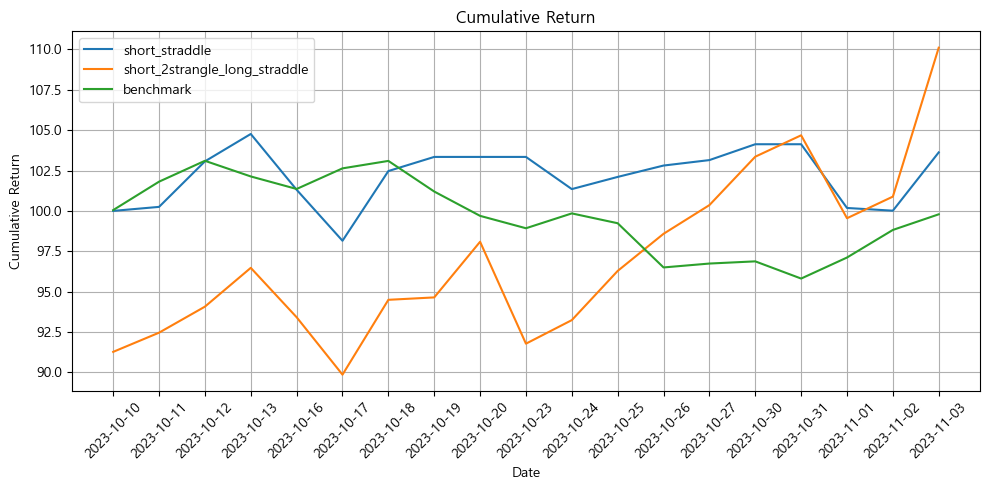

In [416]:
# 포트폴리오 누적수익률 그래프
plt.figure(figsize=(10, 5))
# plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='before')
# plt.plot(new.index, new['return_cumprod'], label='new')
# plt.plot(predict.index, predict['predict_cumprod'], label='predict')
plt.plot(short_straddle.index, short_straddle['predict_cumprod'], label='short_straddle')
# plt.plot(short_straddle_long_straddle.index, short_straddle_long_straddle['predict_cumprod'], label='short_straddle_long_straddle')
# plt.plot(short_1strangle_long_straddle.index, short_1strangle_long_straddle['predict_cumprod'], label='short_1strangle_long_straddle')
plt.plot(short_2strangle_long_straddle.index, short_2strangle_long_straddle['predict_cumprod'], label='short_2strangle_long_straddle')
# plt.plot(short_straddle_long_2strangle.index, short_straddle_long_2strangle['predict_cumprod'], label='short_straddle_long_2strangle')
# plt.plot(short_1strangle_long_2strangle.index, short_1strangle_long_2strangle['predict_cumprod'], label='short_1strangle_long_2strangle')
# plt.plot(short_2strangle_long_2strangle.index, short_2strangle_long_2strangle['predict_cumprod'], label='short_2strangle_long_2strangle')
plt.plot(ks200.index, ks200['return_cumprod'], label='benchmark')
# plt.plot(VKOSPI_Label.index, VKOSPI_Label['return'], label='KOSPI')

# x축 레이블을 날짜로 설정합니다.
# plt.xticks(VKOSPI_Label.index, new.index)

plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)
# , new.index[::int(len(new.index)/10)],
plt.title('Cumulative Return')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

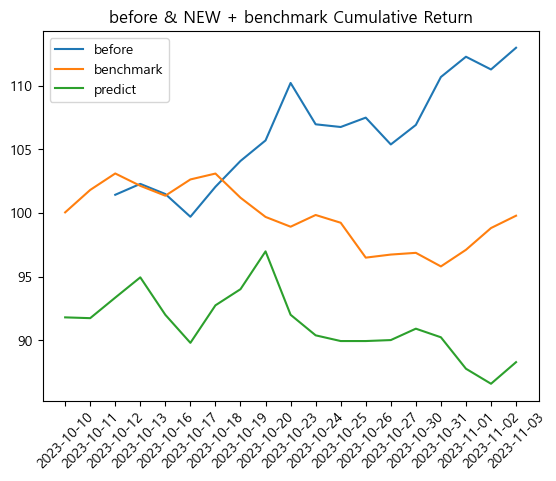

In [417]:
import matplotlib.pyplot as plt

# Assuming you have three different dataframes: VKOSPI_Label, new, and predict

# Plot the first line with x-axis ticks
plt.plot(VKOSPI_Label.index, VKOSPI_Label['return_cumprod'], label='before')
plt.xticks(VKOSPI_Label.index[::int(len(VKOSPI_Label.index)/10)], rotation=45)

# Plot the second line with x-axis ticks
plt.plot(new.index, ks200['return_cumprod'], label='benchmark')
plt.xticks(new.index[::int(len(new.index)/10)], rotation=45)

# Plot the third line with x-axis ticks
plt.plot(predict.index, predict['predict_cumprod'], label='predict')
plt.xticks(predict.index[::int(len(predict.index)/10)], rotation=45)

plt.title('before & NEW + benchmark Cumulative Return')
plt.legend()
plt.show()

# 양매도, 양매수 스트랭글

In [418]:
for i in range(len(VKOSPI_Label.index)):
    d = VKOSPI_Label.index[i] # 시점
    if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트래들
        try:
            cost = 0
            cost += CTB9sp['S+4'].loc[d]
            cost += PTB9sp['S-4'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+4'].loc[d]
            revenue += PTB15sp['S-4'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
    else: # label == 1 변동성 상승 양매수 스트래들
        try:
            cost = 0
            cost += CTB9sp['S+4'].loc[d]
            cost += PTB9sp['S-4'].loc[d]
            VKOSPI_Label['cost'].loc[d] = cost
            revenue = 0
            revenue += CTB15sp['S+4'].loc[d]
            revenue += PTB15sp['S-4'].loc[d]
            VKOSPI_Label['revenue'].loc[d] = revenue
        except:
            VKOSPI_Label['cost'].loc[d] = np.nan
            VKOSPI_Label['revenue'].loc[d] = np.nan
VKOSPI_Label['profit'] = VKOSPI_Label['revenue'] - VKOSPI_Label['cost']
print(VKOSPI_Label)
print(VKOSPI_Label['profit'].sum())

            VKOSPI_Label  cost  revenue  profit    return  return_cumprod
날짜                                                                       
2023-10-10             1   NaN      NaN     NaN       NaN             NaN
2023-10-11             0   NaN      NaN     NaN       NaN             NaN
2023-10-12             0   NaN      NaN     NaN  0.014311      101.431127
2023-10-13             0   NaN      NaN     NaN  0.008439      102.287086
2023-10-16             1   NaN      NaN     NaN -0.007784      101.490839
2023-10-17             0   NaN      NaN     NaN -0.017588       99.705824
2023-10-18             0   NaN      NaN     NaN  0.023597      102.058577
2023-10-19             1   NaN      NaN     NaN  0.019876      104.087070
2023-10-20             1   NaN      NaN     NaN  0.015476      105.697941
2023-10-23             0   NaN      NaN     NaN  0.042683      110.209439
2023-10-24             0   NaN      NaN     NaN -0.029449      106.963834
2023-10-25             1   NaN      Na

# 버터플

In [419]:
# for d in VKOSPI_Label.index:    
#     if VKOSPI_Label.loc[d, 'VKOSPI_Label'] == 0: # 변동성 하락 양매도 스트랭글
#         try:
#             cost = 0
#             cost -= CTB09sp['S-1'].loc[d]
#             cost -= CTB09sp['S+1'].loc[d]
#             cost += 2 * CTB09sp['기준행사가'].loc[d]
#             VKOSPI_Label['cost'].loc[d] = cost # 9시 값 합
#             revenue = 0
#             revenue += CTB15sp['S-1'].loc[d]
#             revenue += CTB15sp['S+1'].loc[d]
#             revenue -= 2 * CTB15sp['기준행사가'].loc[d]
#             VKOSPI_Label['revenue'].loc[d] = revenue # 15시 값 합
#             VKOSPI_Label['profit'].loc[d] = cost + revenue
#             # VKOSPI_Label['return'].loc[d] = (cost - revenue) / revenue
#         except:     
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan 
#             VKOSPI_Label['profit'].loc[d] = np.nan 
#             VKOSPI_Label['return'].loc[d] = np.nan
#     else: # label == 1 변동성 상승 양매수 스트래들
#         try:
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan
#             VKOSPI_Label['profit'].loc[d] = np.nan
#             VKOSPI_Label['return'].loc[d] = np.nan
#         except:
#             VKOSPI_Label['cost'].loc[d] = np.nan
#             VKOSPI_Label['revenue'].loc[d] = np.nan
#             VKOSPI_Label['profit'].loc[d] = np.nan
#             VKOSPI_Label['return'].loc[d] = np.nan